In [1]:
import numpy as np
import networkx as nx
import sympy as sy
import scipy.linalg as la
import non_backtracking_tools as nbt
import matplotlib.pyplot as plt
import nb_general as nb

In [2]:
# Create K
create_K = lambda A, D: np.block([[A,D-np.eye(D.shape[0])],[-np.eye(D.shape[0]),np.zeros_like(D)]])

# $K_4$

In [3]:
G = nx.complete_graph(4)

In [4]:
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
C, B = nb.to_edge_space(G,B=True, graph=False)
K = create_K(A,D)

In [5]:
vals, vecs = la.eig(K)

In [6]:
K

matrix([[ 0.,  1.,  1.,  1.,  2.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  1.,  0.,  2.,  0.,  0.],
        [ 1.,  1.,  0.,  1.,  0.,  0.,  2.,  0.],
        [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  2.],
        [-1., -0., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -1., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -1., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -0., -1.,  0.,  0.,  0.,  0.]])

In [7]:
np.allclose(vecs@np.diag(vals)@la.inv(vecs),K)

True

In [8]:
vec1 = vals[0]*np.round(vecs[:,0],3)
vec2 = vals[1]*np.round(vecs[:,1],3)
vec3 = vals[2]*np.round(vecs[:,2],3)
vec4 = vals[3]*np.round(vecs[:,3],3)
vec5 = vals[4]*np.round(vecs[:,4],3)
vec6 = vals[5]*np.round(vecs[:,5],3)
vec7 = vals[6]*np.round(vecs[:,6],3)
vec8 = vals[7]*np.round(vecs[:,7],3)

In [9]:
S = np.stack([vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8],axis=1)

In [10]:
vals

array([ 2. +0.j        ,  1. +0.j        , -0.5+1.32287566j,
       -0.5-1.32287566j, -0.5+1.32287566j, -0.5-1.32287566j,
       -0.5+1.32287566j, -0.5-1.32287566j])

In [11]:
D_hat = np.diag(np.sum(B,axis=1))
I = np.eye(D_hat.shape[0])

In [12]:
la.eigvals(la.inv(D_hat-I)@B)

array([-0.5+1.32287566j, -0.5-1.32287566j,  2. +0.j        ,
       -1. +0.j        , -1. +0.j        , -0.5+1.32287566j,
       -0.5-1.32287566j, -0.5+1.32287566j, -0.5-1.32287566j,
        1. +0.j        ,  1. +0.j        ,  1. +0.j        ])

# $C_4$

In [13]:
G = nx.cycle_graph(4)
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
K = create_K(A,D)

In [14]:
vals, vecs = la.eig(K)

In [15]:
K

matrix([[ 0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
        [-1., -0., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -1., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -1., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -0., -1.,  0.,  0.,  0.,  0.]])

In [16]:
np.allclose(vecs@np.diag(vals)@la.inv(vecs),K)

False

In [17]:
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
K = create_K(A,D)

In [18]:
vals, vecs = la.eig(K)

In [19]:
K

matrix([[ 0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
        [-1., -0., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -1., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -1., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -0., -1.,  0.,  0.,  0.,  0.]])

In [20]:
np.allclose(vecs@np.diag(vals)@la.inv(vecs),K)

False

In [21]:
vec1 = vals[0]*np.round(vecs[:,0],3)
vec2 = vals[1]*np.round(vecs[:,1],3)
vec3 = vals[2]*np.round(vecs[:,2],3)
vec4 = vals[3]*np.round(vecs[:,3],3)
vec5 = vals[4]*np.round(vecs[:,4],3)
vec6 = vals[5]*np.round(vecs[:,5],3)
vec7 = vals[6]*np.round(vecs[:,6],3)
vec8 = vals[7]*np.round(vecs[:,7],3)

In [22]:
S = np.stack([vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8],axis=1)

In [23]:
C, B = nb.to_edge_space(G, B=True,graph=False)

In [24]:
bvals, bvecs = la.eig(B)

In [25]:
np.allclose(bvecs@np.diag(bvals)@la.inv(bvecs),B)

True

In [26]:
la.eigvals(K)

array([ 1.00000000e+00+9.12506037e-09j,  1.00000000e+00-9.12506037e-09j,
       -1.00000000e+00+6.96937998e-09j, -1.00000000e+00-6.96937998e-09j,
        2.77555756e-17+1.00000000e+00j,  2.77555756e-17-1.00000000e+00j,
       -1.38777878e-16+1.00000000e+00j, -1.38777878e-16-1.00000000e+00j])

In [27]:
la.eigvals(B)

array([-1.00000000e+00+0.j,  8.32667268e-17+1.j,  8.32667268e-17-1.j,
        1.00000000e+00+0.j, -1.00000000e+00+0.j,  8.32667268e-17+1.j,
        8.32667268e-17-1.j,  1.00000000e+00+0.j])

In [28]:
S, T = nb.create_s_t(G)

In [29]:
D_hat = np.diag(np.sum(B,axis=1))
I = np.eye(D_hat.shape[0])
D_hat-I

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
la.eigvals(la.inv(D_hat-I)@B)

LinAlgError: singular matrix

In [31]:
la.inv(np.block([S,T.T]))

LinAlgError: singular matrix

# Simple Example from Presentation

In [32]:
G = nx.Graph([[1,2],[1,3],[2,4],[3,5],[4,5],[2,5],[3,4],[2,3]])

In [33]:
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree).values()))
K = create_K(A,D)

In [34]:
vals, vecs = la.eig(K)

In [35]:
K

matrix([[ 0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  1.,  1.,  0.,  3.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  1.,  1.,  0.,  0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.],
        [ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  2.],
        [-1., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0., -1., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0., -0., -1., -0., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0., -0., -0., -1., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0., -0., -0., -0., -1.,  0.,  0.,  0.,  0.,  0.]])

In [36]:
np.allclose(vecs@np.diag(vals)@la.inv(vecs),K)

True

In [37]:
vec1 = vals[0]*np.round(vecs[:,0],3)
vec2 = vals[1]*np.round(vecs[:,1],3)
vec3 = vals[2]*np.round(vecs[:,2],3)
vec4 = vals[3]*np.round(vecs[:,3],3)
vec5 = vals[4]*np.round(vecs[:,4],3)
vec6 = vals[5]*np.round(vecs[:,5],3)
vec7 = vals[6]*np.round(vecs[:,6],3)
vec8 = vals[7]*np.round(vecs[:,7],3)

In [38]:
S, T = nb.create_s_t(G)

print(np.block([S,T.T]))

[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [39]:
S2 = np.stack([vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8],axis=1)

In [40]:
S2

array([[-0.74392282+0.00000000e+00j,  0.316     +0.00000000e+00j,
         0.08100877+7.29910402e-01j,  0.08100877-7.29910402e-01j,
        -0.40624051+6.13761242e-01j, -0.40624051-6.13761242e-01j,
         0.        -0.00000000e+00j,  0.        +0.00000000e+00j],
       [-1.00782205+0.00000000e+00j,  0.316     +0.00000000e+00j,
        -0.10487358+9.40009363e-02j, -0.10487358-9.40009363e-02j,
         0.06545595-4.71275132e-01j,  0.06545595+4.71275132e-01j,
        -0.306     +1.01488719e+00j, -0.306     -1.01488719e+00j],
       [-1.00782205+0.00000000e+00j,  0.316     +0.00000000e+00j,
        -0.10487358+9.40009363e-02j, -0.10487358-9.40009363e-02j,
         0.06545595-4.71275132e-01j,  0.06545595+4.71275132e-01j,
         0.306     -1.01488719e+00j,  0.306     +1.01488719e+00j],
       [-0.93502226+0.00000000e+00j,  0.316     +0.00000000e+00j,
         0.05505376-3.20260753e-01j,  0.05505376+3.20260753e-01j,
        -0.04538471+3.67984072e-01j, -0.04538471-3.67984072e-01j,
       

$\mu(A-\mu I)-(D-I)$ Inverse

In [41]:
g = nx.Graph([[1,2],[2,3],[3,4],[4,1],[2,4]])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


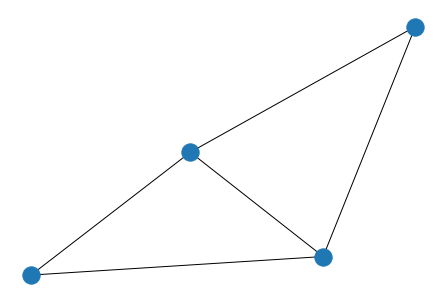

In [42]:
nx.draw(g)
plt.show()

In [43]:
A = nx.adjacency_matrix(g).todense()
D = np.diag(list(dict(g.degree()).values()))
I = np.eye(D.shape[0])
K = nb.create_k(g)

In [44]:
mu = la.eigvals(K)

In [45]:
for mu in la.eigvals(K):
    mu = round(mu,3)
    print(mu)
    try:
        print(la.solve(mu*(A-mu*I)-(D-I),I))
        print(mu*(A-mu*I)-(D-I))
    except:
        print('Pass')
        continue

(1.521+0j)
[[1187.6159081 +0.j 1293.91691064+0.j 1187.91770916+0.j 1293.91691064+0.j]
 [1293.91691064+0.j 1409.28883923+0.j 1293.91691064+0.j 1409.46023526+0.j]
 [1187.91770916+0.j 1293.91691064+0.j 1187.6159081 +0.j 1293.91691064+0.j]
 [1293.91691064+0.j 1409.46023526+0.j 1293.91691064+0.j 1409.28883923+0.j]]
[[-3.313441+0.j  1.521   +0.j  0.      +0.j  1.521   +0.j]
 [ 1.521   +0.j -4.313441+0.j  1.521   +0.j  1.521   +0.j]
 [ 0.      +0.j  1.521   +0.j -3.313441+0.j  1.521   +0.j]
 [ 1.521   +0.j  1.521   +0.j  1.521   +0.j -4.313441+0.j]]
(1+0j)
Pass
(-0.761+0.858j)
[[ 298.93633897-539.63275468j -145.02102822+391.85605397j
   299.2852611 -539.09221818j -145.02102822+391.85605397j]
 [-145.02102822+391.85605397j   56.44274762-277.53816705j
  -145.02102822+391.85605397j   57.23179238-277.21154204j]
 [ 299.2852611 -539.09221818j -145.02102822+391.85605397j
   298.93633897-539.63275468j -145.02102822+391.85605397j]
 [-145.02102822+391.85605397j   57.23179238-277.21154204j
  -145.0210282

In [46]:
1187.6159081/1.521

780.812562853386

In [11]:
g = nx.Graph([[1,2],[2,3],[3,4],[4,5],[5,2],[4,1]])

In [15]:
K = nb.create_k(g)

In [16]:
kvals, kvecs = la.eig(K)

In [17]:
np.allclose(kvecs@np.diag(kvals)@la.inv(kvecs),K)

True

In [18]:
kvals

array([ 1.41421356+0.j        , -1.41421356+0.j        ,
       -1.        +0.j        ,  1.        +0.j        ,
        0.        +1.41421356j,  0.        -1.41421356j,
        0.        +1.j        ,  0.        -1.j        ,
        0.        +1.j        ,  0.        -1.j        ])

# Non-cycle with no stationary distribution

In [172]:
G = nx.Graph([[1,2],[2,3],[3,1],[3,4]])

In [173]:
C, B = nb.to_edge_space(G, graph=False, B=True)
K = nb.create_k(G)

In [174]:
la.eigvals(K)

array([ 0.00000000e+00+0.00000000e+00j, -5.00000000e-01+8.66025404e-01j,
       -5.00000000e-01-8.66025404e-01j,  1.00000000e+00+1.75959302e-08j,
        1.00000000e+00-1.75959302e-08j, -5.15550708e-16+0.00000000e+00j,
       -5.00000000e-01+8.66025404e-01j, -5.00000000e-01-8.66025404e-01j])

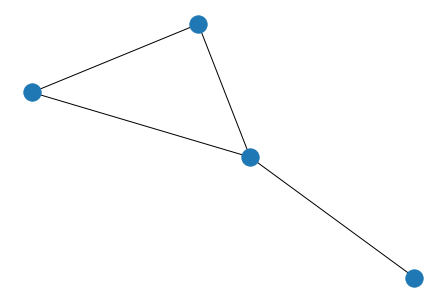

In [176]:
nx.draw(G)

In [130]:
vals, vecs = la.eig(K)

In [183]:
K

matrix([[ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
        [ 1.,  1.,  0.,  1.,  0.,  0.,  2.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [-1., -0., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -1., -0., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -1., -0.,  0.,  0.,  0.,  0.],
        [-0., -0., -0., -1.,  0.,  0.,  0.,  0.]])

In [128]:
vecs[:,3]

array([0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
       0.5+0.j])

In [129]:
vecs[:,-2]

array([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
       0.5+0.j])

In [107]:
B[[0,3,5,7]]

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0.]])

In [100]:
nx.strongly_connected.number_strongly_connected_components(nx.DiGraph(B))

4

In [108]:
B@vecs[:,-2]

array([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
       0.5+0.j])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


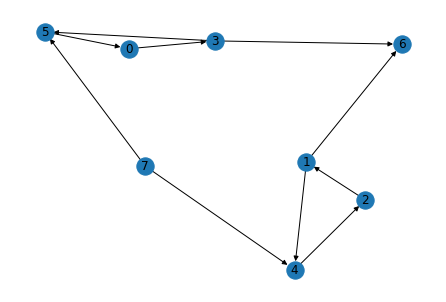

In [109]:
nx.draw(nx.DiGraph(B),with_labels=True)

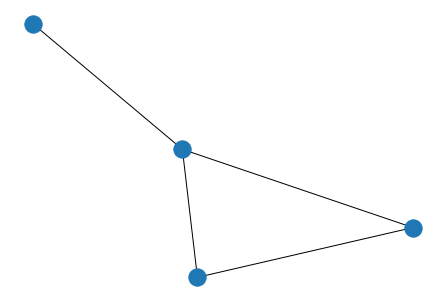

In [112]:
nx.draw(G)

In [116]:
new_G = nx.Graph([[2,3],[3,4],[4,5],[5,6],[6,3],[6,4]])

In [119]:
C, B = nb.to_edge_space(G, graph=False, B=True)
la.eig(B)

(array([ 0. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ,
        -0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ,  0. +0.j       ]),
 array([[ 0.00000000e+000+0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j,
          0.00000000e+000-0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j,
          2.50000000e-001+4.33012702e-01j,
          2.50000000e-001-4.33012702e-01j,
          5.00000000e-001+0.00000000e+00j,
          2.68738480e-308+0.00000000e+00j],
        [ 0.00000000e+000+0.00000000e+00j,
          5.00000000e-001+0.00000000e+00j,
          5.00000000e-001-0.00000000e+00j,
          5.00000000e-001+0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j,
          0.00000000e+000-0.00000000e+00j,
          0.00000000e+000+0.00000000e+00j,
          4.91245866e-308+0.00000000e+00j],
        [ 0.00000000e+000+0.00000000e+00j,
         -2.50000000e-001-4.33012702e-01j,
         -2.50000000e-001+4.33012702e-01j,
          5.00000000e-001+0

In [120]:
K = nb.create_k(G)

In [121]:
la.eig(K)

(array([ 0.00000000e+00+0.00000000e+00j, -5.00000000e-01+8.66025404e-01j,
        -5.00000000e-01-8.66025404e-01j,  1.00000000e+00+1.75959302e-08j,
         1.00000000e+00-1.75959302e-08j, -5.15550708e-16+0.00000000e+00j,
        -5.00000000e-01+8.66025404e-01j, -5.00000000e-01-8.66025404e-01j]),
 array([[ 0.00000000e+00+0.00000000e+00j, -1.33630621e-01+2.31455025e-01j,
         -1.33630621e-01-2.31455025e-01j,  3.53553391e-01+0.00000000e+00j,
          3.53553391e-01-0.00000000e+00j, -9.78695143e-32+0.00000000e+00j,
         -2.39991092e-01-3.03824434e-01j, -2.39991092e-01+3.03824434e-01j],
        [ 0.00000000e+00+0.00000000e+00j,  2.67261242e-01-4.62910050e-01j,
          2.67261242e-01+4.62910050e-01j,  3.53553391e-01+4.13590306e-25j,
          3.53553391e-01-4.13590306e-25j, -1.50196919e-31+0.00000000e+00j,
          3.20564786e-02-5.63288814e-02j,  3.20564786e-02+5.63288814e-02j],
        [ 0.00000000e+00+0.00000000e+00j, -1.33630621e-01+2.31455025e-01j,
         -1.33630621e-01-

In [135]:
B@B@B@B

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 2., 0.]])

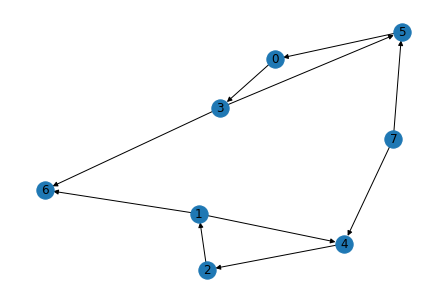

In [137]:
nx.draw(nx.DiGraph(B),with_labels=True)

In [140]:
D_hat = np.diag(np.sum(B,axis=1))

In [141]:
D_hat

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2.]])

In [185]:
la.det(A-D)

1.7763568394002505e-15

# Bipartite stationary

In [186]:
G = nx.Graph([[1,2],[2,3],[3,4],[4,5],[5,2],[1,4]])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


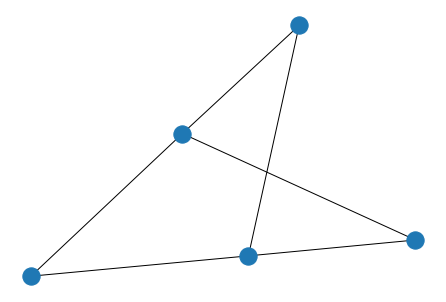

In [187]:
nx.draw(G)

In [188]:
K = nb.create_k(G)

In [189]:
C, B = nb.to_edge_space(G, B=True, graph=False)

In [194]:
D_hat = np.diag(np.sum(C,axis=1))
I = np.eye(D_hat.shape[0])

In [195]:
la.eig(la.inv(D_hat-I)@B)

(array([ 1.00000000e+00+0.j        , -1.52655666e-16+1.j        ,
        -1.52655666e-16-1.j        , -1.00000000e+00+0.j        ,
        -6.93889390e-18+0.70710678j, -6.93889390e-18-0.70710678j,
         7.07106781e-01+0.j        ,  7.07106781e-01+0.j        ,
        -3.88578059e-16+0.70710678j, -3.88578059e-16-0.70710678j,
        -7.07106781e-01+0.j        , -7.07106781e-01+0.j        ]),
 array([[-2.88675135e-01+0.00000000e+00j,  3.05311332e-16+2.88675135e-01j,
          3.05311332e-16-2.88675135e-01j, -2.88675135e-01+0.00000000e+00j,
         -2.45878554e-16+3.33333333e-01j, -2.45878554e-16-3.33333333e-01j,
         -3.33333333e-01+0.00000000e+00j, -6.56957608e-02+0.00000000e+00j,
         -2.29980519e-02-1.89480115e-02j, -2.29980519e-02+1.89480115e-02j,
          3.33333333e-01+0.00000000e+00j,  1.84107292e-02+0.00000000e+00j],
        [-2.88675135e-01+0.00000000e+00j, -3.60822483e-16-2.88675135e-01j,
         -3.60822483e-16+2.88675135e-01j, -2.88675135e-01+0.00000000e+00j,
 

In [196]:
kvals, kvecs = la.eig(K)

In [197]:
np.allclose(kvecs@np.diag(kvals)@la.inv(kvecs),K)

True

Examples

In [47]:
g = nx.gnp_random_graph(10,.7)

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


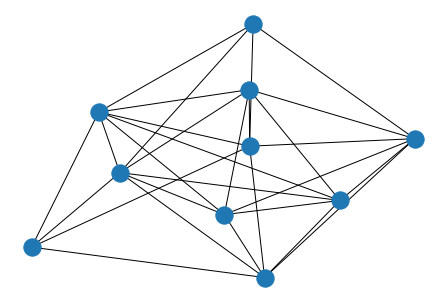

In [49]:
nx.draw(g)

In [50]:
ex = nb.NBEigVals(G)
ex.mu_vals

array([ 2.27499334+0.j        ,  1.        +0.j        ,
        0.12899486+1.16227771j,  0.12899486-1.16227771j,
       -0.76649153+1.15804008j, -0.76649153-1.15804008j,
       -0.5       +1.6583124j , -0.5       -1.6583124j ,
       -0.5       +1.32287566j, -0.5       -1.32287566j])